# Perceptron Algorithm

## Importing Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from feature_engineering import *
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("../data/dataset1.csv")
df = df.drop('id', axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': -1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Imputation to remove NaN values

In [4]:
mean = np.mean(df, axis=0)
for i in range(1, df.shape[1]):
    df.iloc[:, i].fillna(mean[i-1], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Perceptron Class

In [5]:
class Perceptron:
    def __init__(self, lr=0.001, epochs=10):
        self.lr = lr
        self.epochs = epochs
        self.weights = None

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            y_h=np.dot(X,self.weights)
            for idx, x_i in X.iterrows():
                y_hat = np.dot(x_i, self.weights)
                if y_hat*y[idx]<=0:
                    self.weights += x_i*y[idx]

    def predict(self, X):
        y_hat=np.dot(X, self.weights)
        return np.where(y_hat >= 0, 1, -1)

## Task 1: Perceptron on raw data (PM1)

In [6]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)
split_idx = int(len(df) * 0.67)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [7]:
PM1 = Perceptron(lr = 0.01, epochs = 500)
PM1.train(X_train, y_train)
y_pred1 = PM1.predict(X_test)

accuracy1 = evaluate(y_test, y_pred1)

Confusion Matrix: {'true_positive': 42, 'true_negative': 94, 'false_positive': 51, 'false_negative': 1}
Accuracy: 72.34042553191489%
Precision: 45.16129032258065%
Recall: 97.67441860465117%


## Task 1: Perceptron on shuffled data (PM2)

In [8]:
df_shuffled = df.sample(frac=1, random_state=42) #suffling dataset
y_shuffled = df_shuffled['diagnosis']
X_shuffled = df_shuffled.drop(['diagnosis'], axis=1)
split_idx = int(len(df_shuffled) * 0.67)
X_train, X_test = X_shuffled[:split_idx], X_shuffled[split_idx:]
y_train, y_test = y_shuffled[:split_idx], y_shuffled[split_idx:]

In [9]:
PM2 = Perceptron(lr = 0.01, epochs = 500)
PM2.train(X_train, y_train)
y_pred2 = PM1.predict(X_test)

accuracy2 = evaluate(y_test, y_pred2)

Confusion Matrix: {'true_positive': 73, 'true_negative': 76, 'false_positive': 36, 'false_negative': 3}
Accuracy: 79.25531914893617%
Precision: 66.97247706422019%
Recall: 96.05263157894737%


## Task 2: Perceptron on normalised data without shuffling (PM3)

### Normalising

In [10]:
mean = np.mean(X, axis=0)
stddev = np.std(X, axis=0)
X_normalised = (X - mean) / stddev
split_idx = int(len(df) * 0.67)
X_train, X_test = X_normalised[:split_idx], X_normalised[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [11]:
X_normalised.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.094615,-2.073335,1.264830,0.984375,1.568466,3.283515,2.652742,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,1.998726,1.307686,2.616665,2.109368,2.296076,2.750622,1.937015
1,1.818905,-0.353632,1.678196,1.908708,-0.826962,-0.487072,-0.025779,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.888300,-0.375612,-0.430444,-0.147944,1.087084,-0.243890,0.281190
2,1.571860,0.456187,1.559507,1.558884,0.942210,1.052926,1.362479,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.455364,0.527407,1.082932,0.854239,1.955000,1.152255,0.201391
3,-0.749801,0.253732,-0.585900,-0.764464,3.283553,3.402909,1.915269,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.545081,3.394275,3.893397,1.989374,2.175786,6.046041,4.935010
4,1.740300,-1.151816,1.768236,1.826229,0.280372,0.539340,1.370017,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220492,0.220556,-0.313395,0.612333,0.729259,-0.868353,-0.397100


In [12]:
PM3 = Perceptron(lr = 0.01, epochs = 500)
PM3.train(X_train, y_train)
y_pred3 = PM3.predict(X_test)

accuracy3 = evaluate(y_test, y_pred3)

Confusion Matrix: {'true_positive': 40, 'true_negative': 135, 'false_positive': 10, 'false_negative': 3}
Accuracy: 93.08510638297872%
Precision: 80.0%
Recall: 93.02325581395348%


## Task 3:   Perceptron on Normalised data with shuffled features (PM4)

In [13]:
df = df.sample(frac = 1, axis = 1)
df.head()

,concave points_se,compactness_worst,fractal_dimension_mean,area_mean,radius_mean,concave points_worst,texture_se,radius_worst,texture_mean,fractal_dimension_se,...,smoothness_mean,diagnosis,symmetry_mean,texture_worst,compactness_mean,fractal_dimension_worst,concavity_worst,radius_se,area_worst,concave points_mean
0,0.01587,0.6656,0.07871,1001.0,17.99,0.2654,0.9053,25.38,10.38,0.006193,...,0.11840,1,0.2419,17.33,0.27760,0.11890,0.7119,1.0950,2019.0,0.14710
1,0.01340,0.1866,0.05667,1326.0,20.57,0.1860,0.7339,24.99,17.77,0.003532,...,0.08474,1,0.1812,23.41,0.07864,0.08902,0.2416,0.5435,1956.0,0.07017
2,0.02058,0.4245,0.05999,1203.0,19.69,0.2430,0.7869,23.57,21.25,0.004571,...,0.10960,1,0.2069,25.53,0.15990,0.08758,0.4504,0.7456,1709.0,0.12790
3,0.01867,0.8663,0.09744,386.1,11.42,0.2575,1.1560,14.91,20.38,0.009208,...,0.14250,1,0.2597,26.50,0.28390,0.17300,0.6869,0.4956,567.7,0.10520
4,0.01885,0.2050,0.05883,1297.0,20.29,0.1625,0.7813,22.54,14.34,0.005115,...,0.10030,1,0.1809,16.67,0.13280,0.07678,0.4000,0.7572,1575.0,0.10430


In [14]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)
mean = np.mean(X, axis=0)
stddev = np.std(X, axis=0)
X_normalised = (X - mean) / stddev
split_idx = int(len(df) * 0.67)
X_train, X_test = X_normalised[:split_idx], X_normalised[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [15]:
PM4 = Perceptron(lr = 0.01, epochs = 500)
PM4.train(X_train, y_train)
y_pred4 = PM4.predict(X_test)

accuracy4 = evaluate(y_test, y_pred4)

Confusion Matrix: {'true_positive': 40, 'true_negative': 135, 'false_positive': 10, 'false_negative': 3}
Accuracy: 93.08510638297872%
Precision: 80.0%
Recall: 93.02325581395348%


## Results

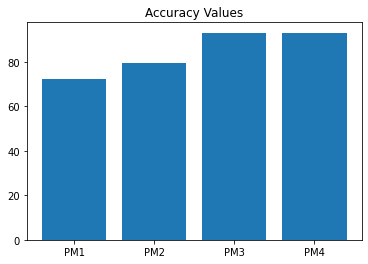

{'PM1': 72.34042553191489, 'PM2': 79.25531914893617, 'PM3': 93.08510638297872, 'PM4': 93.08510638297872}


In [16]:
accuracy = {'PM1': accuracy1, 
            'PM2': accuracy2, 
            'PM3':  accuracy3, 
            'PM4': accuracy4}
names = ['PM1', 'PM2', 'PM3', 'PM4']
values = [accuracy1, accuracy2, accuracy3, accuracy4]
plt.bar(range(len(accuracy)), values, tick_label = names)
plt.title("Accuracy Values")
plt.show()
print (accuracy)